In [ ]:
### Notebook to analyse semantic change around ethnic, religious, and caste categories in the selected GM
### ESSHC 2025

### Author: jiaqi.zhu@dh.huc.knaw.nl 

In [ ]:
### I use code from Barbara McGillivray in this notebook. 
### link: https://github.com/BarbaraMcG/darwin-semantic-change/blob/main/Semantic_change_Darwin_BMcG_Aug2024.ipynb

### I. Reading the selected GM

In [1]:
# on cleaned letters, not full letters because they are not as cleaned as the selected ones
import spacy
import pandas as pd

df = pd.read_csv('/Users/zhujiaqi/trifecta/all_letters.tsv',sep='\t')

In [2]:
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610.0,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610.0,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610.0,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611.0,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612.0,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765.0,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766.0,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766.0,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766.0,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


In [3]:
import numpy as np
# Drop rows with NaN or infinite values in the float column and convert to integer
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['year'])
df['year'] = df['year'].astype(int)

In [4]:
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN


Number of letters per year

In [5]:
df0 = df.groupby(['year']).count()
df0 = df0['title']
df0

year
1610    3
1611    1
1612    8
1614    9
1615    2
       ..
1763    3
1764    3
1765    3
1766    3
1767    1
Name: title, Length: 155, dtype: int64

Visualize number of letters per year with a bar plot:

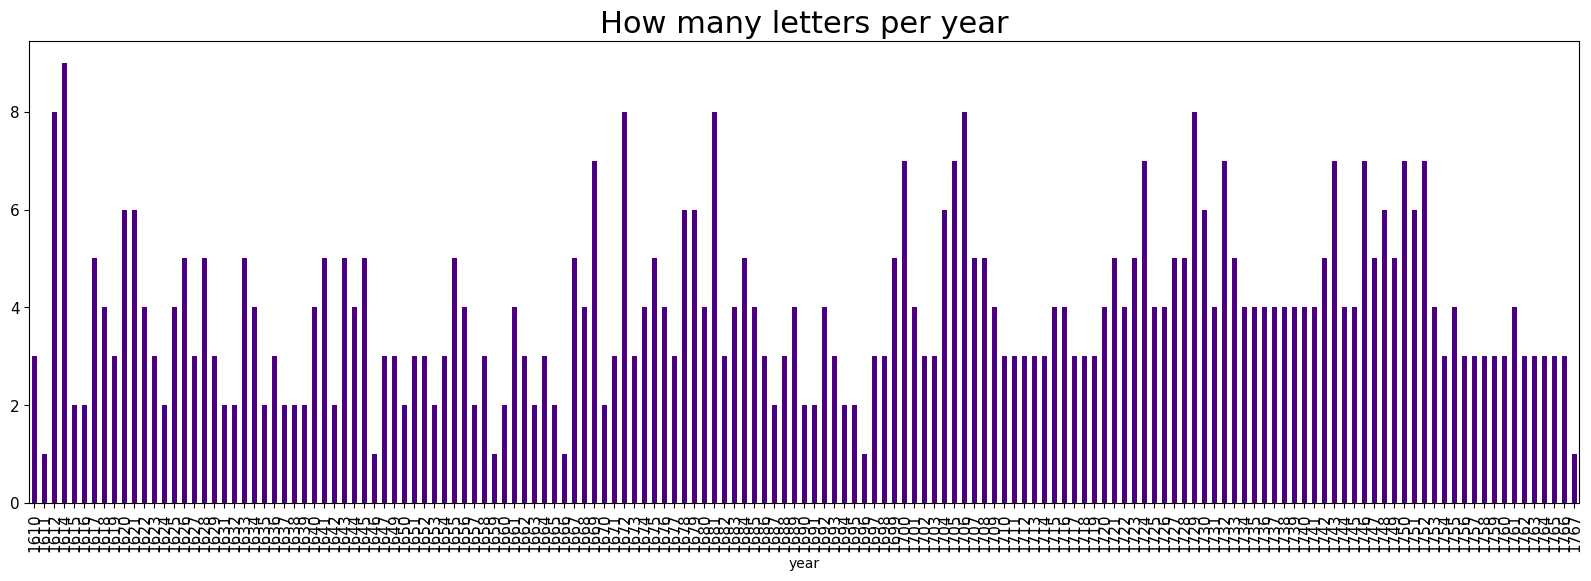

In [6]:
import matplotlib.pyplot as plt

ax = df0.plot(kind='bar', figsize=(20,6), color="indigo", fontsize=11);
#ax.set_alpha(0.5)
ax.set_title("How many letters per year", fontsize=22)
plt.show()

we can check if the letters contains our interested word, e.g., moor:

In [7]:
import re

pd.set_option('display.max_colwidth', 60)
word_of_interest = "moor"

def extract_context(text, word, window=30):
    pattern = re.compile(rf".{{0,{window}}}{word}.{{0,{window}}}", re.IGNORECASE)
    match = pattern.search(text)
    return match.group(0) if match else ''

filtered_df = df[df['text'].str.contains(word_of_interest, case=False, na=False)]
filtered_df['Context'] = filtered_df['text'].apply(lambda x: extract_context(x, word_of_interest))
# Temporarily set options to display all rows and columns
pd.set_option('display.max_rows', None)  # None means no limit

print(filtered_df[['year', 'Context']].sort_values(by='year'))

# Reset options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

     year                                                      Context
3    1611  rs koy, die sij sochten te vermoorden, roepende altemael...
5    1612  en was gevallen. bij nacht vermoort ende buyten ’t recif...
14   1614  tandt (soo zij seyden) van ’t Moorse gelooff. Waerinne i...
35   1618           nde meest met al het volck vermoort sijn geworden.
48   1621   mede geen deech, want als de Mooren bemercken, dat men ...
55   1623   attentaten deser trouweloose Mooren voor te comen, is m...
58   1624  ons advyseert, werden alle in Moorenlanden geconsumeert,...
60   1625   hoe d’Engelsen aldaer met de Mooren weder in nieuwe moe...
63   1625   gevalle den plicht van sijne Moorsche wedt mede soude n...
68   1626  . ende alle dien trouweloosen Moorsen aenhangh dient t’e...
66   1626  inueerdt, gelijck mede dat de Mooren van Masilipatnam oo...
64   1626  n ende daermede voorts met de Moorsche schepen naer de C...
70   1627  ch een jongen verradelijck vermoort ende acht deerlijck ...
79   1

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/3456413172.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Context'] = filtered_df['text'].apply(lambda x: extract_context(x, word_of_interest))


In [8]:
filtered_df[['year', 'Context']].groupby('year').size().reset_index(name='count_of_texts')

,year,count_of_texts
0,1611,1
1,1612,1
2,1614,1
3,1618,1
4,1621,1
...,...,...
141,1763,3
142,1764,2
143,1765,2
144,1766,2


### II. Linguistic pre-processing

In [9]:
# I import (modern) dutch dictionary from spacy
# is there any better way to do this since what we have is old dutch?
sp = spacy.load("nl_core_news_sm")

I split the letters into sentences, although this step may not be needed in the end. 

In [10]:
df['text'] = df['text'].astype(str)

df['text_spacy'] = [sp(df['text'].iloc[i]) for i in range(df.shape[0])]
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,..."


I lemmatise the letters. 

In [11]:
df['Lemmas'] = [[word.lemma_ for word in sp(df['text'].iloc[i])] for i in range(df.shape[0])]
df

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Lemmas
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,..."


Stopwords exclusion and further filtering. 
I exclude non-alphabetical characters:

In [12]:
df["Lemmas_clean"] = ''
for i in range(df.shape[0]):
    df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
df

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/610486668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/610486668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_clean'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in '''!()-[]{};:\'"\,<>./?@#$%^&*_~\|–—\“’`''']# and t.isalpha() ]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/610486668.py:3: SettingWithCopy

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Lemmas,Lemmas_clean
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u...","[«, scheepshericht, vnl., handelen, over, uitg..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, de, inhoud, van, deze, brief, zijn, evenmi..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t...","[principaelijck, besich, zijn, in, ’t, opbouwe..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ...","[mijn, advys, soud, Oock, sijn, dat, U, E, gee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, het, twee, gezandschap, op, Colombo, a..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder...","[Den, ongeluckig, uitslag, de, in, 1762, onder..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 28 ...,NaN,"(Ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,...","[ook, hebben, wij, bij, secreet, besluyt, van,..."


I exclude stop words, although they will be needed for word embedding training:

In [13]:
from nltk.corpus import stopwords
import nltk

#I manually added these stopwords from what i have seen from the VOC data. 
# I had a discussion with Esger a few months ago to know how they deal with the stopwoprds in old Dutch in Republic project and he said it seems to him a gopod solution 
old_stoplist = ['„','den','wij','t','ende','—','ten','wel','uijt','soo','de','van','en','in',
                                        'ten','uyt','ƒ','maer','daer','f',
            'dese', 'des','den', 'ter', 'aen', 'soude',
            'sullen', 'sal', 'haer', 'sij', 'hadde',
            'desen','ofte','se','sijn', 'onse',
            'sonder', 'soo', 'eenige', 'sijne',
            'oock', 'alsoo', 'naer', 'weder',
            'seer', 'ende', 'mede', 'dog', 'dogh',
            'konnen', 'off', 'connen', 'buyten',
            'daarvan', 'souden', 'nae', 'wesen',
            'waarvan', 'aldaer', 'tegens', 'dien','vande','alhier','welke','aldaar','alle','aande','deselve','noch',
               'lb', 'zullen', 'moeten', 'enen', 'd', 'ander','hadden', 'sijnde','zijnde', 'hebbende', 'daarmet', 'alleen'] 

stopwords = set(stopwords.words('dutch')+old_stoplist)
df["Lemmas_nostop"] = ''
for i in range(df.shape[0]):
    df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
df

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/2440660643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/2440660643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmas_nostop'].iloc[i] = [t for t in df['Lemmas'].iloc[i] if t not in stopwords]
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_33459/2440660643.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

,Unnamed: 0,page,title,rawdate,seq,place,year,month,day,author,pid,status,authorFull,text,rest,text_spacy,Lemmas,Lemmas_clean,Lemmas_nostop
0,0,3,Both; aan boord van het Wapen van Amsterdam vo...,25 februari 1610,I,aan boord van het Wapen van Amsterdam voor Ile...,1610,2.0,25.0,Both,NaN,NaN,Pieter Both,"«Scheepshericht, vnl. handelend over uitgedeel...",NaN,"(«, Scheepshericht, ,, vnl., handelend, over, ...","[«, scheepshericht, ,, vnl., handelen, over, u...","[«, scheepshericht, vnl., handelen, over, uitg...","[«, scheepshericht, ,, vnl., handelen, uitgede..."
1,1,3,Both; aan boord van het Wapen van Amsterdam li...,6 augustus 1610,II,aan boord van het Wapen van Amsterdam liggende...,1610,8.0,6.0,Both,NaN,NaN,Pieter Both,"«„Journaelsgewijse"" reisbeschrijving »",NaN,"(«, „, Journaelsgewijse, "", reisbeschrijving, »)","[«, „, Journaelsgewijse, "", reisbeschrijving, »]","[«, „, Journaelsgewijse, reisbeschrijving, »]","[«, Journaelsgewijse, "", reisbeschrijving, »]"
2,2,3,Both; aan boord van het Wapen van Amsterdam te...,14 oktober 1610,III,aan boord van het Wapen van Amsterdam ter Rede...,1610,10.0,14.0,Both,NaN,NaN,Pieter Both,«De inhoud van deze brief is evenmin als die v...,NaN,"(«, De, inhoud, van, deze, brief, is, evenmin,...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, de, inhoud, van, deze, brief, zijn, evenmi...","[«, inhoud, brief, evenmin, beide, vorig, alge..."
3,3,4,"Both; Kasteel Nassau op Banda-Neira, 18 juli 1611",18 juli 1611,IV,Kasteel Nassau op Banda-Neira,1611,7.0,18.0,Both,NaN,NaN,Pieter Both,. . . Principaelijck besich geweest in ’t opbo...,NaN,"(., ., ., Principaelijck, besich, geweest, in,...","[., ., ., principaelijck, besich, zijn, in, ’t...","[principaelijck, besich, zijn, in, ’t, opbouwe...","[., ., ., principaelijck, besich, ’t, opbouwen..."
4,4,7,"Both; aan boord van de Vere voor Maleyo, 31 ma...",31 maart 1612,V,aan boord van de Vere voor Maleyo,1612,3.0,31.0,Both,NaN,NaN,Pieter Both,"Mijn advys soude oock sijn, dat U E geen licht...",NaN,"(Mijn, advys, soude, oock, sijn, ,, dat, U, E,...","[mijn, advys, soud, Oock, sijn, ,, dat, U, E, ...","[mijn, advys, soud, Oock, sijn, dat, U, E, gee...","[advys, soud, Oock, ,, U, E, licht, vrouw, vad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,13,745,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1765,XIV,Batavia,1765,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Dan vermits den gouverneur Fockens ons bij zij...,NaN,"(Dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[dan, vermits, den, gouverneur, Fockens, ons, ...","[vermits, gouverneur, Fockens, apart, brief, v..."
603,14,883,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",8 april 1766,XV,Batavia,1766,4.0,8.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Nadat het tweede gezandschap op Colombo aangek...,NaN,"(Nadat, het, tweede, gezandschap, op, Colombo,...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, het, twee, gezandschap, op, Colombo, a...","[nadat, twee, gezandschap, Colombo, aankomen, ..."
604,15,893,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",21 oktober 1766,XVI,Batavia,1766,10.0,21.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Den ongeluckigen uitslag der in 1762 ondernome...,NaN,"(Den, ongeluckigen, uitslag, der, in, 1762, on...","[Den, ongeluckig, uitslag, de, in, 1762, onder...","[Den, ongeluckig, uitslag, de, in, 1762, onder...","[Den, ongeluckig, uitslag, 1762, ondernomeen, ..."
605,16,943,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",31 december 1766,XVII,Batavia,1766,12.0,31.0,"Van der Parra, Van Riemsdijk, Schreuder, Van B...",NaN,NaN,"Petrus Albertus van der Parra, Jeremias van Ri...",Ook hebben wij bij secreet besluyt van den 

### III. Training word embeddings
Function for printing the vocabulary of a model

In [14]:
def print_vocab(model, top_n = None):
  count = 0
  if top_n is not None:
    for index, word in enumerate(model.wv.index_to_key):
      count+= 1
      if count < top_n:
        print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")
  else:
    for index, word in enumerate(model.wv.index_to_key):
      print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

In [15]:
print(df['Lemmas_clean'].head())

0    [«, scheepshericht, vnl., handelen, over, uitg...
1        [«, „, Journaelsgewijse, reisbeschrijving, »]
2    [«, de, inhoud, van, deze, brief, zijn, evenmi...
3    [principaelijck, besich, zijn, in, ’t, opbouwe...
4    [mijn, advys, soud, Oock, sijn, dat, U, E, gee...
Name: Lemmas_clean, dtype: object


I train Word2Vec embeddings from the letters. 

min_count: the minimum frequency threshold allowed for a word to be included

vector_size: the number of dimensions in which we wish to represent our word. This is the size of the word embedding; typically between 100 and 1,000.

window: The size of the context window determines how many words before and after a given word would be included as context words of the given word. Typically between 5 and 10.

sg: – Training algorithm: 1 for skip-gram; otherwise CBOW.

In [16]:
import time
import gensim

start = time.time()
cbow_w5_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 5, sg = 0)
end = time.time()
print("It has taken", round(end - start), "seconds")
start = time.time()
cbow_w5_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 0)
end = time.time()
print("It has taken", round(end - start), "seconds")

It has taken 17 seconds
It has taken 34 seconds


In [17]:
print_vocab(cbow_w5_f1_300, 10)

word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op


In [18]:
# Check the vocabulary
vocabulary = list(cbow_w5_f1_300.wv.index_to_key)
print(vocabulary[:20])  # Display the first 20 words in the vocabulary

['de', 'van', 'en', 'te', 'zijn', 'in', 'het', '\n', 'op', 'een', 'hebben', 'dat', 'met', 'den', 'die', 'worden', 'voor', 'niet', 'aan', 'tot']


Different parameters. 

In [19]:
#300 dimensions:
start = time.time()
cbow_w5_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 5, sg = 0)
end = time.time()
print("cbow_w5_f0_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 5, sg = 1)
end = time.time()
print("sg_w5_f1_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 5, sg = 1)
end = time.time()
print("sg_w5_f0_300 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f1_300 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f0_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f1_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=300, window = 10, sg = 1)
end = time.time()
print("sg_w10_f1_300 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f0_300 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=300, window = 10, sg = 1)
end = time.time()
print("sg_w10_f0_300 has taken", round(end - start), "seconds")
#1000 dimensions:
start = time.time()
cbow_w5_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 5, sg = 0)
end = time.time()
print("cbow_w5_f0_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
end = time.time()
print("sg_w5_f1_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w5_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 5, sg = 1)
end = time.time()
print("sg_w5_f0_1000 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f1_1000 has taken", round(end - start), "seconds")
start = time.time()
cbow_w10_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 10, sg = 0)
end = time.time()
print("cbow_w10_f0_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f1_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=1, vector_size=1000, window = 10, sg = 1)
end = time.time()
print("sg_w10_f1_1000 has taken", round(end - start), "seconds")
start = time.time()
sg_w10_f0_1000 = gensim.models.Word2Vec(df['Lemmas_clean'], min_count=0, vector_size=1000, window = 10, sg = 1)
end = time.time()
print("sg_w10_f0_1000 has taken", round(end - start), "seconds")

cbow_w5_f0_300 has taken 17 seconds
sg_w5_f1_300 has taken 57 seconds
sg_w5_f0_300 has taken 62 seconds
cbow_w10_f1_300 has taken 20 seconds
cbow_w10_f0_300 has taken 20 seconds
sg_w10_f1_300 has taken 102 seconds
sg_w10_f0_300 has taken 104 seconds
cbow_w5_f0_1000 has taken 37 seconds
sg_w5_f1_1000 has taken 117 seconds
sg_w5_f0_1000 has taken 111 seconds
cbow_w10_f1_1000 has taken 36 seconds
cbow_w10_f0_1000 has taken 36 seconds
sg_w10_f1_1000 has taken 194 seconds
sg_w10_f0_1000 has taken 196 seconds


Skip-gram is more computationally expensive, especially with larger window sizes.

Let's save the models so we can use them later. You can skip this cell.

In [20]:
import os

models_folder = '/Users/zhujiaqi/trifecta'
models = [cbow_w5_f1_300, cbow_w5_f1_1000, cbow_w5_f0_300, cbow_w5_f0_1000, sg_w5_f1_300, sg_w5_f1_1000, sg_w5_f0_300, sg_w5_f0_1000, cbow_w10_f1_300, cbow_w10_f1_1000, cbow_w10_f0_300, cbow_w10_f0_1000, sg_w10_f1_300, sg_w10_f1_1000, sg_w10_f0_300, sg_w10_f0_1000]
models_names = ['cbow_w5_f1_300', 'cbow_w5_f1_1000', 'cbow_w5_f0_300', 'cbow_w5_f0_1000', 'sg_w5_f1_300', 'sg_w5_f1_1000', 'sg_w5_f0_300', 'sg_w5_f0_1000', 'cbow_w10_f1_300', 'cbow_w10_f1_1000', 'cbow_w10_f0_300', 'cbow_w10_f0_1000', 'sg_w10_f1_300', 'sg_w10_f1_1000', 'sg_w10_f0_300', 'sg_w10_f0_1000']
for i in range(len(models)):
  print("Saving model number", i+1)
  models[i].save(os.path.join(models_folder, models_names[i]))

Saving model number 1
Saving model number 2
Saving model number 3
Saving model number 4
Saving model number 5
Saving model number 6
Saving model number 7
Saving model number 8
Saving model number 9
Saving model number 10
Saving model number 11
Saving model number 12
Saving model number 13
Saving model number 14
Saving model number 15
Saving model number 16


Print the first ten words of the vocabulary of each model

In [21]:
for i in range(len(models)):
  print(models_names[i])
  print_vocab(models[i], 10)

cbow_w5_f1_300
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
cbow_w5_f1_1000
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
cbow_w5_f0_300
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
cbow_w5_f0_1000
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #7/230777 is 

word #8/230777 is op
sg_w5_f1_300
word #0/230777 is de
word #1/230777 is van
word #2/230777 is en
word #3/230777 is te
word #4/230777 is zijn
word #5/230777 is in
word #6/230777 is het
word #

Let's look at the most similar words (i.e. neighbours) of words of interest:

In [22]:
#moor
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('moor', 10))

cbow_w5_f1_300 [('Maleyer', 0.9291719198226929), ('gevlugte', 0.9224706292152405), ('Bougineesen', 0.9143174886703491), ('Bouginesen', 0.9136205315589905), ('ponglous', 0.9128745198249817), ('nachodas', 0.9106585383415222), ('volckere', 0.9104636907577515), ('troupen', 0.9102226495742798), ('Maccassaren', 0.9098606705665588), ('Macassaers', 0.9076164364814758)]
cbow_w5_f1_1000 [('gevlugte', 0.9337068200111389), ('Portugeesen', 0.9247261881828308), ('Dauw', 0.9195827841758728), ('ponglous', 0.9182345867156982), ('Ragias', 0.9170339703559875), ('rijksgroot', 0.9161974787712097), ('Maleyer', 0.9152137041091919), ('borger', 0.9147669076919556), ('Moor', 0.9135339260101318), ('Gaffoer', 0.9129346013069153)]
cbow_w5_f0_300 [('Maleyer', 0.9381802082061768), ('gevlugte', 0.9171504974365234), ('jaghat', 0.9070193767547607), ('Bouginesen', 0.9068750739097595), ('oproerig', 0.904319703578949), ('spolieerpen', 0.9037394523620605), ('portugeesen', 0.9036812782287598), ('chialoep', 0.902427554130554

In [23]:
#mahratten
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('mahratten', 10))

cbow_w5_f1_300 [('taliUe', 0.7294450998306274), ('woelinge', 0.7287614941596985), ('Custcleden', 0.7243292927742004), ('oostwal', 0.7092615365982056), ('Peraz', 0.7089939713478088), ('contesteerd', 0.7083002924919128), ('landkant', 0.7077268362045288), ('ontijden', 0.7060625553131104), ('specificatiën', 0.7047426700592041), ('mancquement', 0.7029268741607666)]
cbow_w5_f1_1000 [('Peraz', 0.7521108388900757), ('klei', 0.7375470995903015), ('Hartieling', 0.6887028217315674), ('pangarangs', 0.6855063438415527), ('tegemoetkoming', 0.6841548085212708), ('vemeedering', 0.6805301904678345), ('laagte', 0.6800022721290588), ('zaaivelad', 0.675285279750824), ('aanmoeding', 0.6749404072761536), ('pedack', 0.6737911701202393)]
cbow_w5_f0_300 [('ringesaar', 0.8235906958580017), ('blintheyt', 0.7899971604347229), ('poelemaar', 0.7834299802780151), ('onversoenelijeken', 0.7735140323638916), ('pallisaden', 0.764703094959259), ('katoen-', 0.7596521973609924), ('4331075', 0.7582628130912781), ('swackheyt

In [24]:
#mogol
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('mogol', 10))

cbow_w5_f1_300 [('Trevancoor', 0.8812094330787659), ('Ragie', 0.8770536780357361), ('Soerapatti', 0.87105393409729), ('rebellig', 0.8708873987197876), ('zoone', 0.8661830425262451), ('Neyk', 0.8632171154022217), ('dessay', 0.8628435730934143), ('Imam', 0.861361563205719), ('Neyck', 0.8601593971252441), ('veldheer', 0.8600135445594788)]
cbow_w5_f1_1000 [('goegoegoe', 0.9037843346595764), ('zoone', 0.9023513197898865), ('Toassa', 0.8965773582458496), ('hoofdregent', 0.8954920768737793), ('veldheer', 0.8895666003227234), ('rijxcancelier', 0.8880667090415955), ('Ragie', 0.8839841485023499), ('tegenwoordigen', 0.883205235004425), ('Zulthan', 0.8829879760742188), ('Estachan', 0.8826632499694824)]
cbow_w5_f0_300 [('balnoor', 0.9294940829277039), ('mandorijn', 0.9273588061332703), ('goegoegoe', 0.923798143863678), ('Vice-Roy', 0.9237484931945801), ('serlaskeer', 0.9233658909797668), ('usurpateur', 0.9224645495414734), ('Neyk', 0.9214791655540466), ('veltheer', 0.9175620675086975), ('Prince', 0

In [25]:
#mardijker
# this one has rather stable meaning, so Manjusha suggested me to have it compared to those have more than one meaning
for i in range(len(models)):
  print(models_names[i], models[i].wv.similar_by_word('mardijker', 10))

cbow_w5_f1_300 [('ambagtsgesellen', 0.9114447236061096), ('pennist', 0.9056287407875061), ('slavinnen', 0.891792356967926), ('mardijcker', 0.8916382193565369), ('vadem', 0.8898094892501831), ('balyse', 0.8895390033721924), ('Bimanees', 0.886696994304657), ('Boeginees', 0.886252760887146), ('bass', 0.885837972164154), ('pantchiallangs', 0.8851668834686279)]
cbow_w5_f1_1000 [('ambagtsgesellen', 0.9356637597084045), ('onderchirurgijns', 0.9130680561065674), ('roggevelel', 0.9024970531463623), ('mardijcker', 0.8994437456130981), ('p.8', 0.8957395553588867), ('fles', 0.8937942385673523), ('slavinnen', 0.8921370506286621), ('bosschieter', 0.8920295238494873), ('26.938', 0.8911662101745605), ('pantchiallangs', 0.8900572657585144)]
cbow_w5_f0_300 [('tandjungpuras', 0.911777675151825), ('slavinnen', 0.9059067368507385), ('bosschieter', 0.9055848121643066), ('ambagtsgesellen', 0.9037309885025024), ('pennist', 0.9012831449508667), ('p.8', 0.8979175090789795), ('bass', 0.8957984447479248), ('mardi

### model choice

In order to do a systematic evaluation and choose the best model for our purposes, we would need to test them all against some "gold standard", e.g. a list of known synonyms for this corpus. We need domain knowledge from the VOC history and 17th.18th Dutch for this step.

In [30]:
# currently I am using the following words just to see if things work, but I would likle to discuss with Manjusha to have "better" words for this task
# which word2vec model will be chosen depends on what  pairs of synonyms as the "gold standard" are selected here
# i found thes highly similar words (similarity scores over 8.8 of 10) from: https://github.com/lizzybrans/Simlex999-Dutch/blob/main/SimLex-999-Dutch-final.txt
# in this paper, they developed a Dutch variant of the SimLex-999 word similarity dataset by gathering similarity judgements from 235 native Dutch speakers.
# but discussed with Manjusha, I added another two pairs "woede":"gramschap" and "insolentie": "geweldenaryen"
synonyms = dict({"eenvoudig": "gemakkelijk", "angstig": "bang", "boosheid": "woede", "vlug": "snel", "woede":"gramschap","insolentie": "geweldenaryen"})
synonyms

{'eenvoudig': 'gemakkelijk',
 'angstig': 'bang',
 'boosheid': 'woede',
 'vlug': 'snel',
 'woede': 'gramschap',
 'insolentie': 'geweldenaryen'}

Check that the synonym pairs are preserved by the models:

In [31]:
from statistics import mean

models_synonymity_average = dict()
for i in range(len(models)):
  print("Model", models_names[i])
  average_synonimity = 0
  synonymities = list()
  for s1 in synonyms:
    print("\tSimilarity between", s1, "and", synonyms[s1],  "in", models_names[i], models[i].wv.similarity(s1, synonyms[s1]))
    synonymities.append(models[i].wv.similarity(s1, synonyms[s1]))
  average_synonimity = mean(synonymities)
  print(average_synonimity)
  models_synonymity_average[models_names[i]] = average_synonimity
models_synonymity_average

Model cbow_w5_f1_300
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f1_300 0.7561045
	Similarity between angstig and bang in cbow_w5_f1_300 0.44535458
	Similarity between boosheid and woede in cbow_w5_f1_300 0.43304196
	Similarity between vlug and snel in cbow_w5_f1_300 0.5091647
	Similarity between woede and gramschap in cbow_w5_f1_300 0.33749622
	Similarity between insolentie and geweldenaryen in cbow_w5_f1_300 0.5486718
0.5049723
Model cbow_w5_f1_1000
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f1_1000 0.7575481
	Similarity between angstig and bang in cbow_w5_f1_1000 0.16907457
	Similarity between boosheid and woede in cbow_w5_f1_1000 0.52545327
	Similarity between vlug and snel in cbow_w5_f1_1000 0.5683373
	Similarity between woede and gramschap in cbow_w5_f1_1000 0.4091515
	Similarity between insolentie and geweldenaryen in cbow_w5_f1_1000 0.54776
0.4962208
Model cbow_w5_f0_300
	Similarity between eenvoudig and gemakkelijk in cbow_w5_f0_300 0.68726647
	Simil

{'cbow_w5_f1_300': 0.5049723,
 'cbow_w5_f1_1000': 0.4962208,
 'cbow_w5_f0_300': 0.51936436,
 'cbow_w5_f0_1000': 0.50585705,
 'sg_w5_f1_300': 0.8281231,
 'sg_w5_f1_1000': 0.8390419,
 'sg_w5_f0_300': 0.8225887,
 'sg_w5_f0_1000': 0.8369228,
 'cbow_w10_f1_300': 0.46781248,
 'cbow_w10_f1_1000': 0.40321136,
 'cbow_w10_f0_300': 0.48035836,
 'cbow_w10_f0_1000': 0.4632886,
 'sg_w10_f1_300': 0.80892384,
 'sg_w10_f1_1000': 0.8150319,
 'sg_w10_f0_300': 0.8180499,
 'sg_w10_f0_1000': 0.8085123}

I choose the model that maximises the average similarity between synonyms:

In [32]:
model_chosen_name = max(models_synonymity_average, key=models_synonymity_average.get)
for i in range(len(models)):
  if models_names[i] == model_chosen_name:
    models[i].save(os.path.join(models_folder, "Chosen_model"))
model_chosen_name

'sg_w5_f1_1000'

## IV. Semantic change with cosine similarity

### Step 1: Define ten time periods and split the corpus

In [33]:
# currently i split the data into two, 17th century data and 18th century data
# we can split it into more slices or split it more sophisticatedly (based on major events), we will try later
date = 1700
time_period_1 = list(range(min(df['year']),date+1))
time_period_2 = list(range(date+1,max(df['year'])+1))
print(time_period_1, time_period_2)

[1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700] [1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767]


In [34]:
(df['year']).describe()

count     604.000000
mean     1692.763245
std        45.155804
min      1610.000000
25%      1655.000000
50%      1699.000000
75%      1732.000000
max      1767.000000
Name: year, dtype: float64

In [35]:
df1 = df[df['year'].isin(time_period_1)]
df2 = df[df['year'].isin(time_period_2)]

In [36]:
max(df1['year'])

1700

In [37]:
df.shape[0] == df1.shape[0] + df2.shape[0]

True

### Step 2. Train word embeddings for the two time periods

I train two word2vec models, one for each dataframe corresponding to a time period. I choose the parameters that led to the best model. This takes approximately 5 minutes. You can skip this cell.

In [38]:
model1 = gensim.models.Word2Vec(df1['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)
model2 = gensim.models.Word2Vec(df2['Lemmas_clean'], min_count=1, vector_size=1000, window = 5, sg = 1)

What are the vocabularies of these models?

In [39]:
print_vocab(model1, 10)

word #0/119486 is de
word #1/119486 is van
word #2/119486 is te
word #3/119486 is en
word #4/119486 is zijn
word #5/119486 is in
word #6/119486 is 

word #7/119486 is met
word #8/119486 is den


In [40]:
print_vocab(model2, 10)

word #0/153109 is de
word #1/153109 is van
word #2/153109 is en
word #3/153109 is zijn
word #4/153109 is te
word #5/153109 is het
word #6/153109 is in
word #7/153109 is een
word #8/153109 is op


In [41]:
print(str(len(list(model1.wv.index_to_key))))
print(str(len(list(model2.wv.index_to_key))))

119486
153109


The intersection between the vocabularies of the two models:

In [42]:
vocab1 = set(list(model1.wv.index_to_key))
vocab2 = set(list(model2.wv.index_to_key))
len(vocab1.intersection(vocab2))

41818

### Step 3. Embedding space alignment

I will be using code from https://gist.github.com/zhicongchen/9e23d5c3f1e5b1293b16133485cd17d8, ported from HistWords https://github.com/williamleif/histwords.

First, I define a function to find the intersection between the vocabularies of two word2vec models:

In [43]:
def intersection_align_gensim(m1, m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1 & vocab_m2
    if words: common_vocab &= set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1 - common_vocab and not vocab_m2 - common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count") + m2.wv.get_vecattr(w, "count"), reverse=True)
    # print(len(common_vocab))

    # Then for each model...
    for m in [m1, m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.key_to_index[w] for w in common_vocab]
        old_arr = m.wv.vectors
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.vectors = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        new_key_to_index = {}
        new_index_to_key = []
        for new_index, key in enumerate(common_vocab):
            new_key_to_index[key] = new_index
            new_index_to_key.append(key)
        m.wv.key_to_index = new_key_to_index
        m.wv.index_to_key = new_index_to_key
        
        print(len(m.wv.key_to_index), len(m.wv.vectors))
        
    return (m1,m2)

Then, I define a function for aligning two spaces with Orthogonal Procrustes:

In [44]:
def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """
    Original script: https://gist.github.com/quadrismegistus/09a93e219a6ffc4f216fb85235535faf
    Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
        
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """

    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the (normalized) embedding matrices
    base_vecs = in_base_embed.wv.get_normed_vectors()
    other_vecs = in_other_embed.wv.get_normed_vectors()

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one, i.e. multiplying the embedding matrix by "ortho"
    other_embed.wv.vectors = (other_embed.wv.vectors).dot(ortho)    
    
    return other_embed

Now I can apply the function to my models:

In [45]:
smart_procrustes_align_gensim(model1, model2, words=None)

41818 41818
41818 41818


Now the two models have been aligned and have the same vocabulary:

In [46]:
len(model1.wv.index_to_key)

41818

In [47]:
len(model2.wv.index_to_key)

41818

In [48]:
model1.wv.index_to_key == model2.wv.index_to_key

True

I print the vocabulary:

In [49]:
model1.wv.index_to_key

['de',
 'van',
 'en',
 'te',
 'zijn',
 'in',
 'het',
 '\n',
 'op',
 'een',
 'hebben',
 'dat',
 'met',
 'den',
 'die',
 'worden',
 'voor',
 'niet',
 'aan',
 'tot',
 'door',
 'om',
 'als',
 'men',
 'bij',
 'er',
 '’t',
 'naar',
 'veel',
 '«',
 '»',
 'sijn',
 'zullen',
 'ook',
 'ƒ',
 'al',
 'moeten',
 'na',
 'schip',
 'over',
 'uit',
 'ander',
 'goed',
 'nog',
 'hij',
 'maar',
 'dan',
 'Batavia',
 'wel',
 'ons',
 'of',
 'kunnen',
 'geen',
 'doen',
 'komen',
 'onder',
 'd',
 'wij',
 'haar',
 'brief',
 'uyt',
 'daar',
 'dit',
 'jaar',
 'f.',
 '1',
 'twee',
 'soo',
 'hem',
 'enen',
 'eenig',
 'hun',
 'wat',
 'laten',
 '’s',
 'tegen',
 'mogen',
 'geven',
 'groot',
 'last',
 'zenden',
 'één',
 'blijven',
 'haer',
 'onse',
 'weinig',
 'aen',
 'Compagnie',
 'zij',
 'deselve',
 'handel',
 'p.',
 'peper',
 'koning',
 'rsd',
 'deze',
 '2',
 'willen',
 'gouverneur',
 'nu',
 'brengen',
 'f',
 'omdat',
 'nemen',
 'houden',
 'maken',
 'alleen',
 'ze',
 'daer',
 'Van',
 '3',
 'sal',
 'plaats',
 'af',
 '

I save the aligned models:

In [50]:
for i in range(len(models)):
  print(models_names[i])
  models[i].save(os.path.join(models_folder, models_names[i] + "_aligned"))

cbow_w5_f1_300
cbow_w5_f1_1000
cbow_w5_f0_300
cbow_w5_f0_1000
sg_w5_f1_300
sg_w5_f1_1000
sg_w5_f0_300
sg_w5_f0_1000
cbow_w10_f1_300
cbow_w10_f1_1000
cbow_w10_f0_300
cbow_w10_f0_1000
sg_w10_f1_300
sg_w10_f1_1000
sg_w10_f0_300
sg_w10_f0_1000


### Step 4. visualisations

a. 

Key Steps in the Code:

Train Word Embeddings: If you don't have pre-trained models, train Word2Vec or FastText on corpora segmented by time periods.

Nearest Neighbors: Use model.wv.most_similar() to find related words for each time period.

Dimensionality Reduction: Apply t-SNE to reduce high-dimensional embeddings to 2D.

Visualization: Plot word embeddings and connect target words across time periods

Number of embeddings: 12


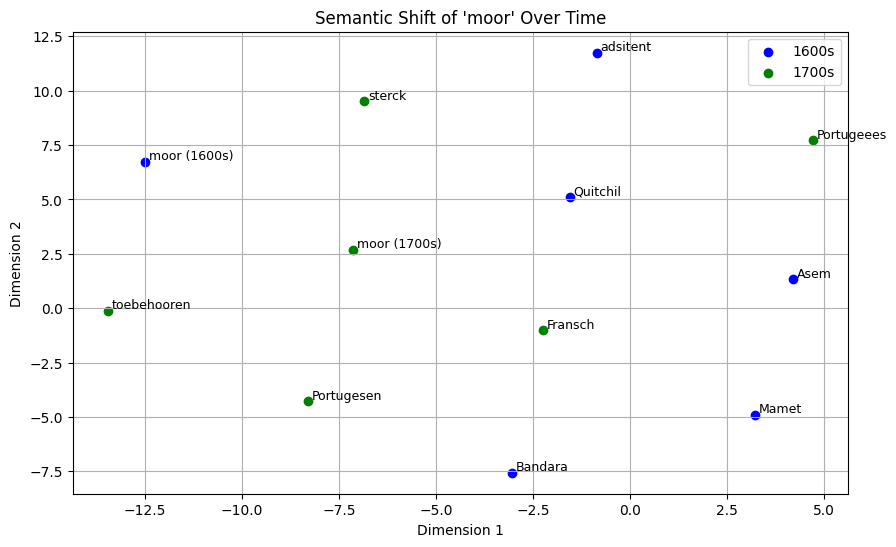

In [57]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Step 1: Load Word Embeddings for Each Time Period
# Assuming you have pre-trained embeddings for each time period
# Example: `model1`, `model2`, are Word2Vec models
models = {
    "1600s": model1,
    "1700s": model2
}

target_word = "moor"
embeddings = []
labels = []
time_points = []

# Step 2: Extract Embeddings and Nearest Neighbors
for time, model in models.items():
    try:
        word_vector = model.wv[target_word]
        embeddings.append(word_vector)
        labels.append(f"{target_word} ({time})")
        time_points.append(time)
        
        # Add neighbors
        for neighbor, _ in model.wv.most_similar(target_word, topn=5):
            embeddings.append(model.wv[neighbor])
            labels.append(neighbor)
            time_points.append(time)
    except KeyError:
        print(f"'{target_word}' not in vocabulary for {time}")


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings list to a NumPy array
embeddings_array = np.array(embeddings)

# Check the number of embeddings
print(f"Number of embeddings: {embeddings_array.shape[0]}")

# Adjust perplexity
perplexity_value = min(embeddings_array.shape[0] - 1, 30)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plot the results
plt.figure(figsize=(10, 6))
colors = {"1600s": "blue", "1700s": "green"}

for i, (x, y) in enumerate(reduced_embeddings):
    time = time_points[i]
    plt.scatter(x, y, color=colors[time], label=time if labels[i].startswith(target_word) else "")
    plt.text(x + 0.1, y + 0.1, labels[i], fontsize=9)

plt.title(f"Semantic Shift of '{target_word}' Over Time")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


Number of embeddings: 12


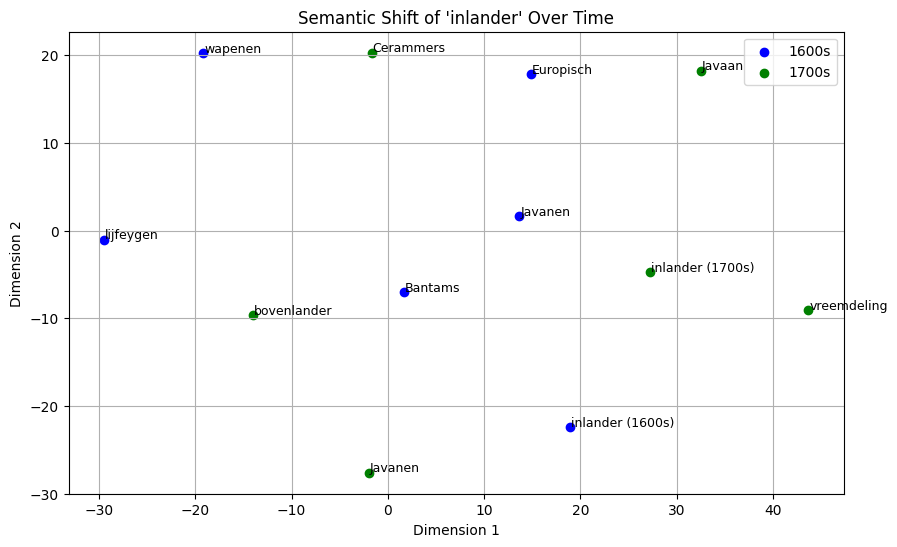

In [58]:
models = {
    "1600s": model1,
    "1700s": model2
}

target_word = "inlander"
embeddings = []
labels = []
time_points = []

# Step 2: Extract Embeddings and Nearest Neighbors
for time, model in models.items():
    try:
        word_vector = model.wv[target_word]
        embeddings.append(word_vector)
        labels.append(f"{target_word} ({time})")
        time_points.append(time)
        
        # Add neighbors
        for neighbor, _ in model.wv.most_similar(target_word, topn=5):
            embeddings.append(model.wv[neighbor])
            labels.append(neighbor)
            time_points.append(time)
    except KeyError:
        print(f"'{target_word}' not in vocabulary for {time}")


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings list to a NumPy array
embeddings_array = np.array(embeddings)

# Check the number of embeddings
print(f"Number of embeddings: {embeddings_array.shape[0]}")

# Adjust perplexity
perplexity_value = min(embeddings_array.shape[0] - 1, 30)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plot the results
plt.figure(figsize=(10, 6))
colors = {"1600s": "blue", "1700s": "green"}

for i, (x, y) in enumerate(reduced_embeddings):
    time = time_points[i]
    plt.scatter(x, y, color=colors[time], label=time if labels[i].startswith(target_word) else "")
    plt.text(x + 0.1, y + 0.1, labels[i], fontsize=9)

plt.title(f"Semantic Shift of '{target_word}' Over Time")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


Number of embeddings: 12


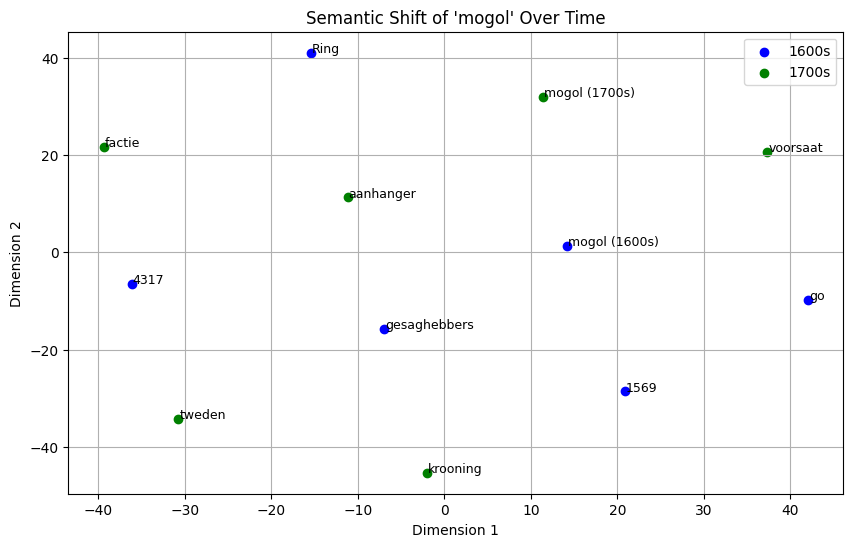

In [60]:
models = {
    "1600s": model1,
    "1700s": model2
}

target_word = "mogol"
embeddings = []
labels = []
time_points = []

# Step 2: Extract Embeddings and Nearest Neighbors
for time, model in models.items():
    try:
        word_vector = model.wv[target_word]
        embeddings.append(word_vector)
        labels.append(f"{target_word} ({time})")
        time_points.append(time)
        
        # Add neighbors
        for neighbor, _ in model.wv.most_similar(target_word, topn=5):
            embeddings.append(model.wv[neighbor])
            labels.append(neighbor)
            time_points.append(time)
    except KeyError:
        print(f"'{target_word}' not in vocabulary for {time}")


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings list to a NumPy array
embeddings_array = np.array(embeddings)

# Check the number of embeddings
print(f"Number of embeddings: {embeddings_array.shape[0]}")

# Adjust perplexity
perplexity_value = min(embeddings_array.shape[0] - 1, 30)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plot the results
plt.figure(figsize=(10, 6))
colors = {"1600s": "blue", "1700s": "green"}

for i, (x, y) in enumerate(reduced_embeddings):
    time = time_points[i]
    plt.scatter(x, y, color=colors[time], label=time if labels[i].startswith(target_word) else "")
    plt.text(x + 0.1, y + 0.1, labels[i], fontsize=9)

plt.title(f"Semantic Shift of '{target_word}' Over Time")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


Number of embeddings: 12


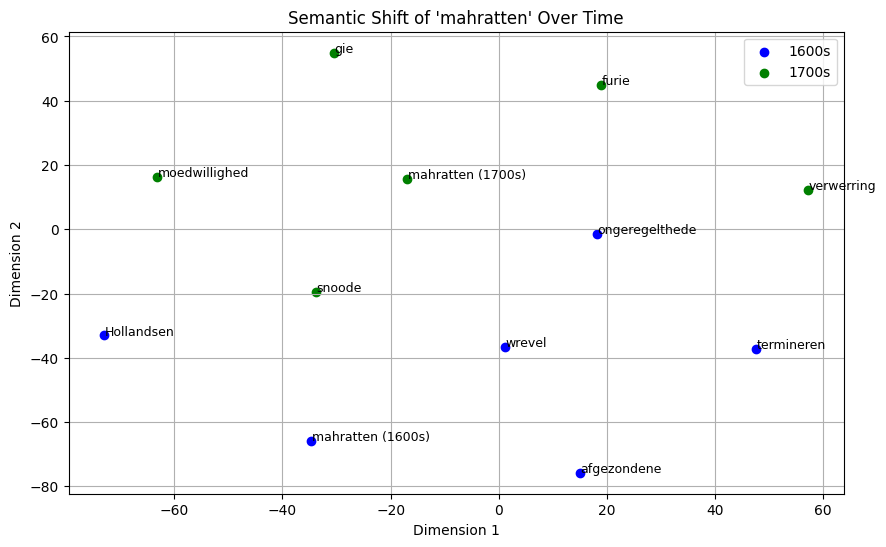

In [61]:
models = {
    "1600s": model1,
    "1700s": model2
}

target_word = "mahratten"
embeddings = []
labels = []
time_points = []

# Step 2: Extract Embeddings and Nearest Neighbors
for time, model in models.items():
    try:
        word_vector = model.wv[target_word]
        embeddings.append(word_vector)
        labels.append(f"{target_word} ({time})")
        time_points.append(time)
        
        # Add neighbors
        for neighbor, _ in model.wv.most_similar(target_word, topn=5):
            embeddings.append(model.wv[neighbor])
            labels.append(neighbor)
            time_points.append(time)
    except KeyError:
        print(f"'{target_word}' not in vocabulary for {time}")


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings list to a NumPy array
embeddings_array = np.array(embeddings)

# Check the number of embeddings
print(f"Number of embeddings: {embeddings_array.shape[0]}")

# Adjust perplexity
perplexity_value = min(embeddings_array.shape[0] - 1, 30)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plot the results
plt.figure(figsize=(10, 6))
colors = {"1600s": "blue", "1700s": "green"}

for i, (x, y) in enumerate(reduced_embeddings):
    time = time_points[i]
    plt.scatter(x, y, color=colors[time], label=time if labels[i].startswith(target_word) else "")
    plt.text(x + 0.1, y + 0.1, labels[i], fontsize=9)

plt.title(f"Semantic Shift of '{target_word}' Over Time")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


Number of embeddings: 12


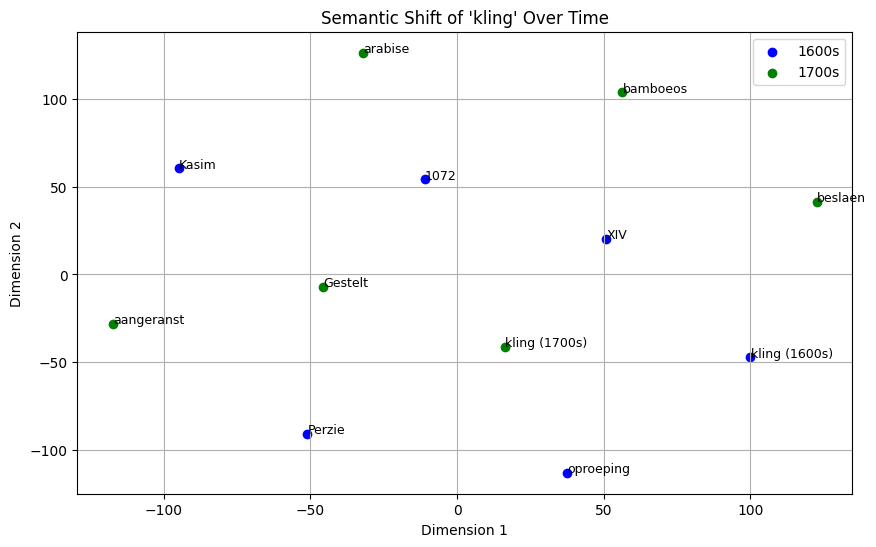

In [62]:
models = {
    "1600s": model1,
    "1700s": model2
}

target_word = "kling"
embeddings = []
labels = []
time_points = []

# Step 2: Extract Embeddings and Nearest Neighbors
for time, model in models.items():
    try:
        word_vector = model.wv[target_word]
        embeddings.append(word_vector)
        labels.append(f"{target_word} ({time})")
        time_points.append(time)
        
        # Add neighbors
        for neighbor, _ in model.wv.most_similar(target_word, topn=5):
            embeddings.append(model.wv[neighbor])
            labels.append(neighbor)
            time_points.append(time)
    except KeyError:
        print(f"'{target_word}' not in vocabulary for {time}")


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings list to a NumPy array
embeddings_array = np.array(embeddings)

# Check the number of embeddings
print(f"Number of embeddings: {embeddings_array.shape[0]}")

# Adjust perplexity
perplexity_value = min(embeddings_array.shape[0] - 1, 30)

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plot the results
plt.figure(figsize=(10, 6))
colors = {"1600s": "blue", "1700s": "green"}

for i, (x, y) in enumerate(reduced_embeddings):
    time = time_points[i]
    plt.scatter(x, y, color=colors[time], label=time if labels[i].startswith(target_word) else "")
    plt.text(x + 0.1, y + 0.1, labels[i], fontsize=9)

plt.title(f"Semantic Shift of '{target_word}' Over Time")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


b.

From Hamilton et al., 2016, "Diachronic Word Embeddings Reveal Statistical Laws of Semantic Change"


"To visualize semantic change for a word wi in two dimensions we employed the following procedure, which relies on the t-SNE embedding method (Van der Maaten and Hinton, 2008) as a subroutine:
1. Find the union of the word wi’s k nearest neighbors over all necessary time-points.
2. Compute the t-SNE embedding of these words on the most recent (i.e., the modern) time-point.
3. For each of the previous time-points, hold all embeddings fixed, except for the target word’s (i.e., the embedding for wi), and optimize a new t-SNE embedding only for the target word. We found that initializing the embedding for the target word to be the centroid of its k'-nearest neighbors in a timepoint was highly effective.


Thus, in this procedure the background words are always shown in their “modern” positions, which makes sense given that these are the current meanings of these words. This approximation is necessary, since in reality all words are moving."

In [70]:
def visualize_semantic_shift(models, target_word, k=10, k_prime=5):
    """
    Visualize semantic shift for a target word `target_word` over time.

    Parameters:
        models (dict): A dictionary with time points as keys and corresponding word2vec models as values.
        target_word (str): The word for which to visualize semantic change.
        k (int): Number of nearest neighbors to consider.
        k_prime (int): Number of neighbors for centroid initialization.
    """
    # Initialize variables
    time_points = list(models.keys())
    last_time = time_points[-1]
    vocab = list(models[last_time].wv.key_to_index.keys())  # Vocabulary from the last time point
    all_neighbors = set()

    # Find k-nearest neighbors for the target word across all time points
    embeddings = {}
    target_indices = {}
    for t in time_points:
        model = models[t]
        if target_word not in model.wv:
            print(f"'{target_word}' not found in vocabulary for {t}")
            continue
        # Collect embeddings
        embeddings[t] = np.array([model.wv[word] for word in vocab])
        target_idx = vocab.index(target_word)
        target_indices[t] = target_idx
        # Collect neighbors
        neighbors = get_k_nearest_neighbors(embeddings[t], target_idx, k)
        all_neighbors.update(neighbors)

    # Add the target word itself to neighbors
    all_neighbors = sorted(all_neighbors)
    all_neighbors.append(target_indices[last_time])

    # Extract embeddings for neighbors in the most recent time point
    modern_embeddings = np.array([models[last_time].wv[vocab[i]] for i in all_neighbors])

    # Adjust perplexity dynamically based on the number of data points
    perplexity_value = min(len(modern_embeddings) - 1, 30)  # Perplexity must be less than the number of samples
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
    fixed_tsne = tsne.fit_transform(modern_embeddings)
    all_neighbors_embedding = {last_time: fixed_tsne}

    # Optimize the target word's embedding for earlier time points
    for t in reversed(time_points[:-1]):
        embedding_t = np.array([models[t].wv[vocab[i]] for i in all_neighbors])
        target_idx_t = all_neighbors.index(target_indices[t])

        # Initialize target embedding to the centroid of its k_prime nearest neighbors
        k_prime_indices = get_k_nearest_neighbors(embedding_t, target_idx_t, k_prime)
        centroid = np.mean(fixed_tsne[k_prime_indices], axis=0)
        target_embedding = fixed_tsne.copy()
        target_embedding[target_idx_t] = centroid

        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value, init=target_embedding, method="exact")
        updated_embedding = tsne.fit_transform(embedding_t)
        all_neighbors_embedding[t] = updated_embedding

    # Plot the results
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(time_points)))
    labels = [vocab[i] for i in all_neighbors]

    for i, t in enumerate(time_points):
        embeddings_t = all_neighbors_embedding[t]
        plt.scatter(
            embeddings_t[:, 0], embeddings_t[:, 1],
            label=f"{t}",
            alpha=0.6,
            color=colors[i]
        )

        if i == 0:
            for idx, label in enumerate(labels):
                plt.text(
                    embeddings_t[idx, 0] + 0.1,
                    embeddings_t[idx, 1] + 0.1,
                    label,
                    fontsize=8,
                    alpha=0.7
                )

    plt.title(f"Semantic Shift of '{target_word}' Over Time")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()


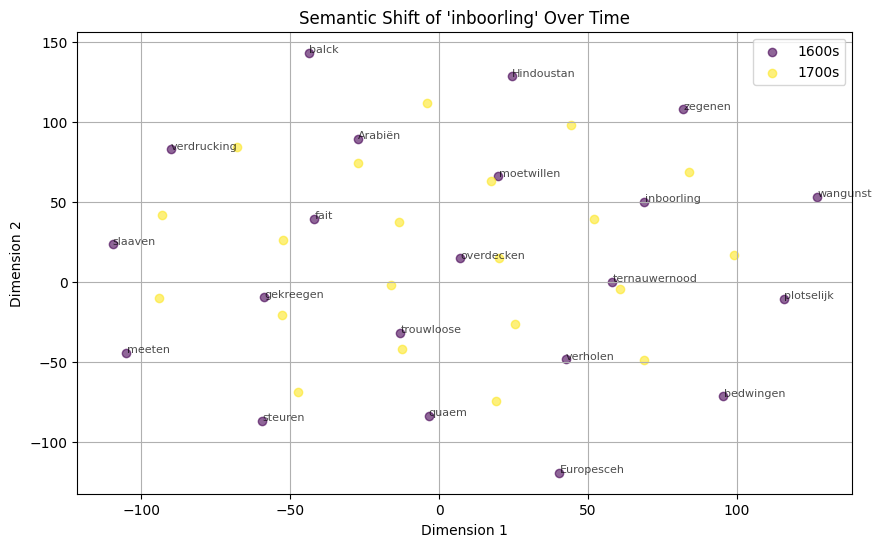

In [71]:
models = {
    "1600s": model1,  # Replace with your word2vec model for the 1600s
    "1700s": model2,  # Replace with your word2vec model for the 1700s
}

target_word = "inboorling"
visualize_semantic_shift(models, target_word=target_word)


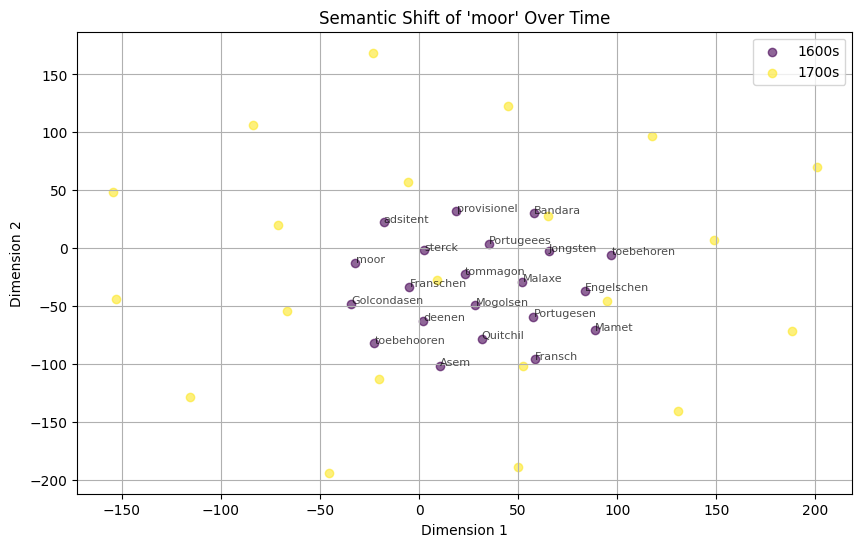

In [72]:
target_word = "moor"
visualize_semantic_shift(models, target_word=target_word)


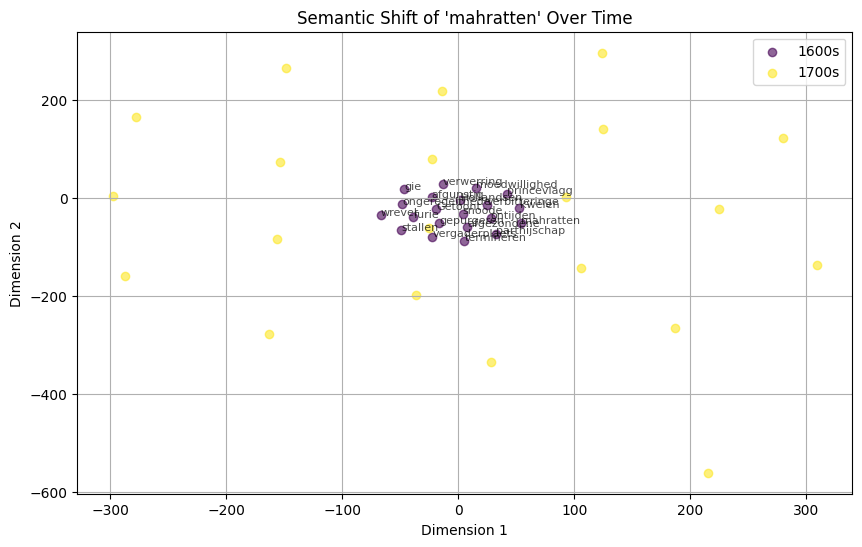

In [73]:
target_word = "mahratten"
visualize_semantic_shift(models, target_word=target_word)


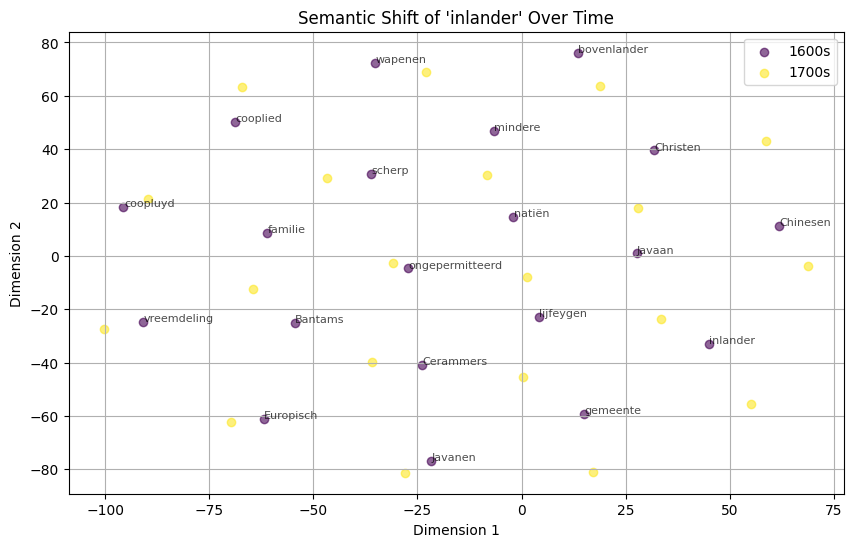

In [74]:
target_word = "inlander"
visualize_semantic_shift(models, target_word=target_word)


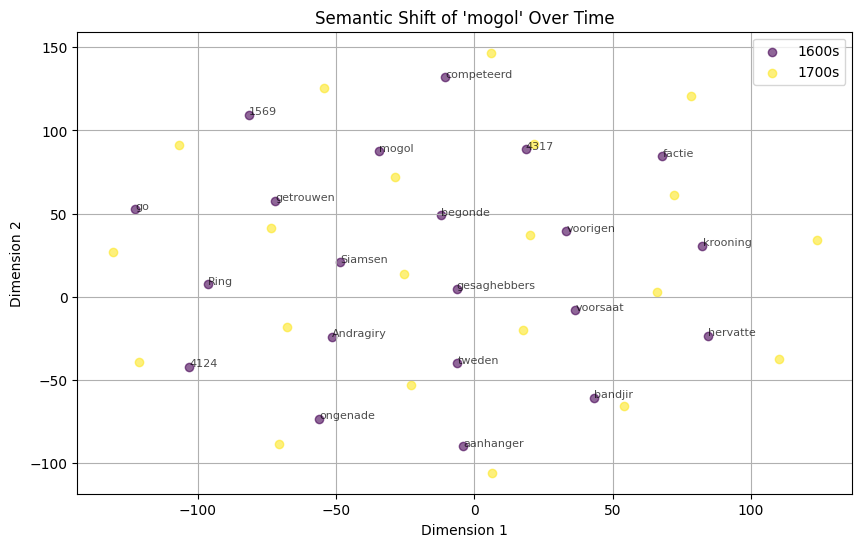

In [75]:
target_word = "mogol"
visualize_semantic_shift(models, target_word=target_word)


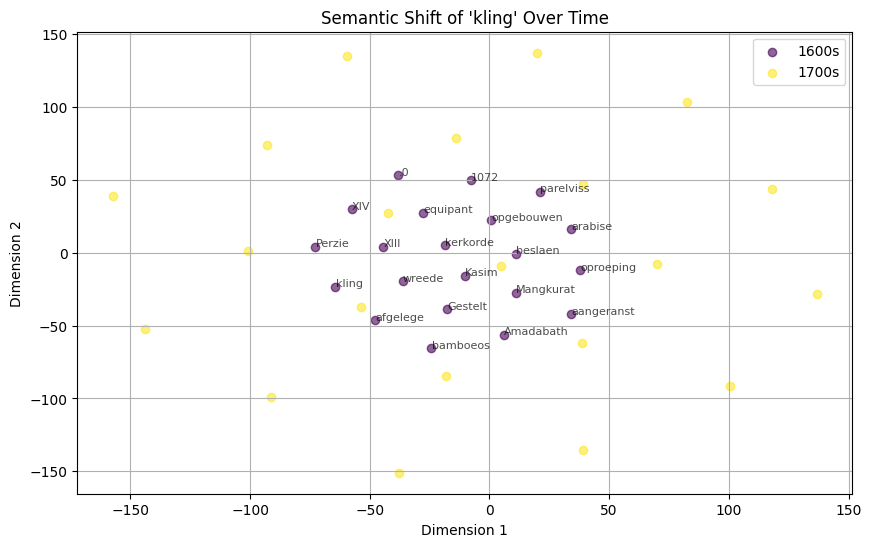

In [76]:
target_word = "kling"
visualize_semantic_shift(models, target_word=target_word)
